# Comparing Bubble, Selection, Insertion sort Algorithms
Analyzing run-times of bubble, selection and insertion sort as well as visualizing algorithm run times with respect to the growing input size

In [4]:
!pip install import-ipynb

In [5]:
import import_ipynb
import bubble, selectionsort, insertionsort

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import time

rcParams['figure.figsize'] = (12, 7)
rcParams['font.size'] = 12
plt.style.use('ggplot')
%matplotlib inline

In [29]:
def compare_sorting_algos(test_size, sorting_algos=[], ):
    '''
    Input : Sorting algorithms to use in lists
    Output : Dataframe of algorithms, average running times
    '''
    if sorting_algos == []:
        return 0
    
    compare_algos = {}
    iterations = 5
    for algo in sorting_algos:
        avg_times = []
        for iteration in range(iterations):
            arr = list(set(np.random.randint(low=-500, high=500, size=(1, test_size))[0]))
            start = time.time()
            sorted_arr = algo(arr)
            avg_times.append(time.time() - start)
        compare_algos[str(algo)] = np.mean(np.array(avg_times))
    return compare_algos

In [32]:
print(compare_sorting_algos(test_size=1500000, sorting_algos=[bubble.bubble_sort, 
                                                          selectionsort.selection_sort, 
                                                          insertionsort.insertion_sort]))

{'<function bubble_sort at 0x7fdeb5dd5ae8>': 0.12398624420166016, '<function selection_sort at 0x7fdeb251ad90>': 0.08178367614746093, '<function insertion_sort at 0x7fdeb299a510>': 0.14487380981445314}


In [19]:
def plot_runtime(algo, test_cases=5):
    '''
    Input parameters : 
    1. algo : Algorithm on which we have to plot the runtimes
    2. test_cases : number of cases to test
    For each test_case we start with an input n=10 and iteratively increase n^#test_case
    '''
    n = 500 # initialize random array size
    runtimes = []
    array_sizes = []
    for test in range(1, test_cases):
        rand_arr = list(set(np.random.randint(low=-500, high=500, size=(1, n))[0]))
        array_sizes.append(n)
        t0 = time.time()
        sorted_arr = algo(rand_arr)
        runtimes.append(time.time() - t0)
        n = n*5
    
    print(runtimes)
    print(array_sizes)
    # runtimes contains the algorithm runtimes
    # array_sizes contain the corresponding "n" (array size) values for runtimes
    fig, ax = plt.subplots()
    ax.set_title('Plots of Runtime (y) vs Array Size(n) (x)')
    ax.set_xlabel('N')
    ax.set_ylabel('Running Time (seconds)')
    ax.plot(array_sizes, runtimes)
    plt.show()

[0.01634955406188965, 0.08545517921447754, 0.10272526741027832, 0.10096287727355957, 0.10203719139099121]
[500, 2500, 12500, 62500, 312500]


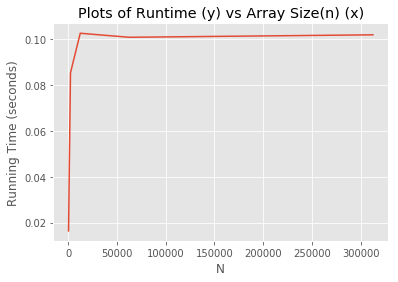

In [20]:
plot_runtime(algo=bubble.bubble_sort, test_cases=6)

[0.011585235595703125, 0.0461275577545166, 0.05869650840759277, 0.05080747604370117, 0.07750177383422852]
[500, 2500, 12500, 62500, 312500]


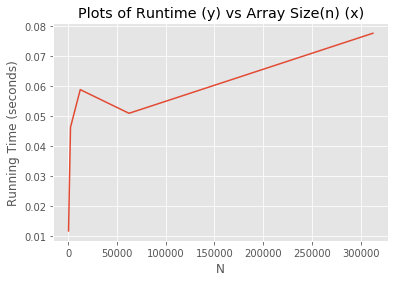

In [21]:
plot_runtime(algo=selectionsort.selection_sort, test_cases=6)

[0.013333320617675781, 0.09198212623596191, 0.08789420127868652, 0.08839678764343262, 0.08533501625061035]
[500, 2500, 12500, 62500, 312500]


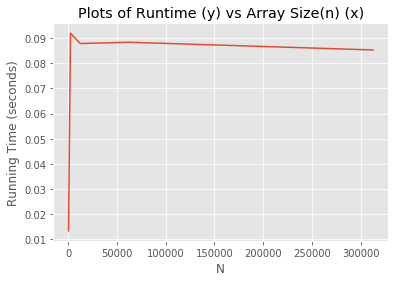

In [22]:
plot_runtime(algo=insertionsort.insertion_sort, test_cases=6)